In [200]:
import pandas as pd

In [201]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
df['year_of_capacity_data'].value_counts() 

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [203]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

1. there is only one value in country column which no use for model Building.
2. there is only one value in country_long column which no use for model Building.
3. other_fuel1, other_fuel2, and other_fuel3 have missing values more than 78%, 99.88% and 100% respectively, We can not imput this much of data by ourself.
4. wepp_id column has 100% missing values.
5. estimated_generation_gwh column has 100% missing values.
6. there is only one value in year_of_capacity_data column which no use for model Building.
7. url, geolocation source, gppd_idnr, owner, source, generation data source, these all columns are also useless.

Hence I will drop these colums before proceeding to EDA.

In [204]:
df.drop(['country', 'country_long', 'name', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'wepp_id', 'estimated_generation_gwh', 'year_of_capacity_data', 'url', 'geolocation_source', 'gppd_idnr', 'owner', 'source', 'generation_data_source' ], axis = 1, inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
import dtale
import warnings
warnings.filterwarnings("ignore")
dtale.show(df)

In [206]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [207]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


1. As we can see that, most of the columns are having big gap between 75th% and Max, meaning they are right skewed, Hence while imputing the missing values we have use median in missing places.
2. The standard deviations of most of the columns are very high

In [208]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['generation_gwh_2013'] = df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())

In [209]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [210]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

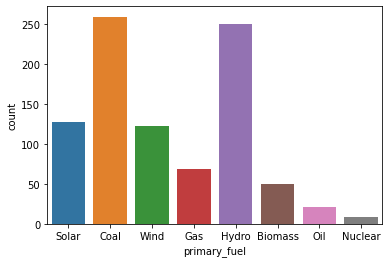

In [211]:
sns.countplot(df['primary_fuel'])

For the all power plants, coal and hydro is the primary fuel, for the rest the frequency of plants is less.

There are total 8 kinds of primary fuels.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

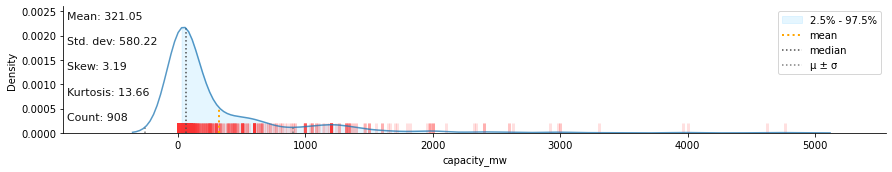

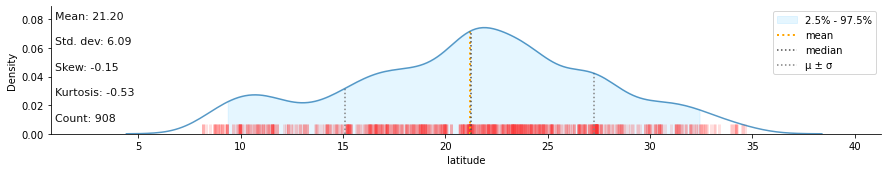

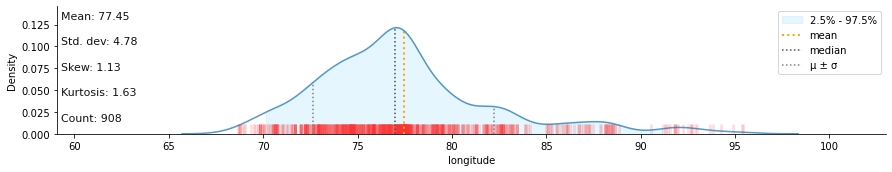

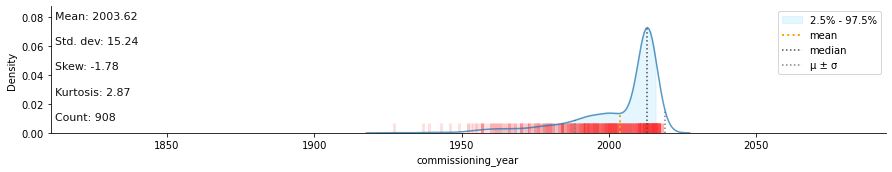

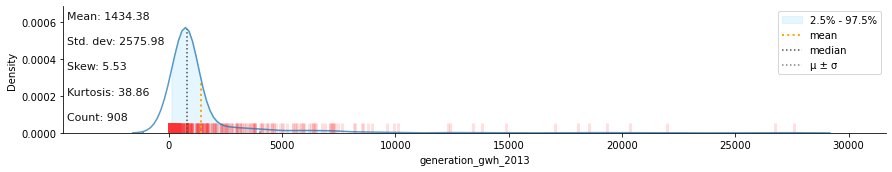

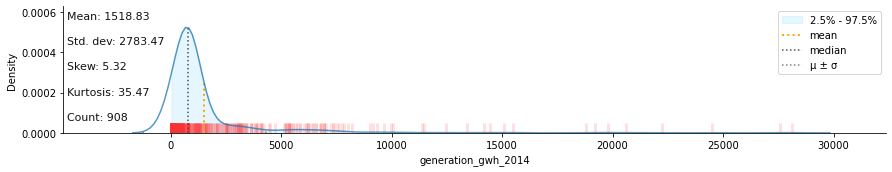

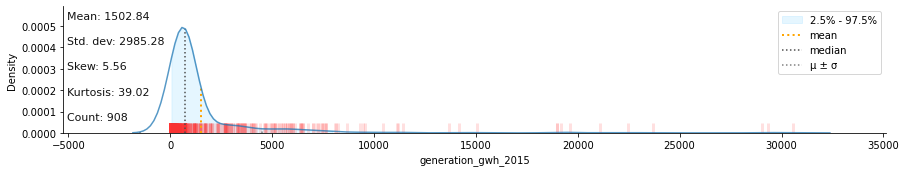

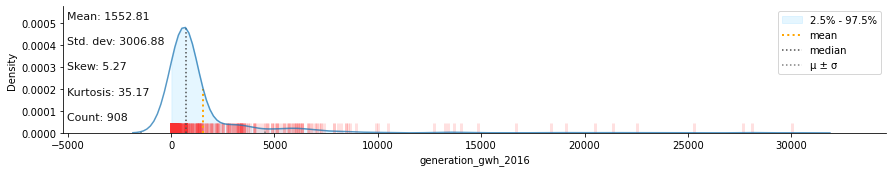

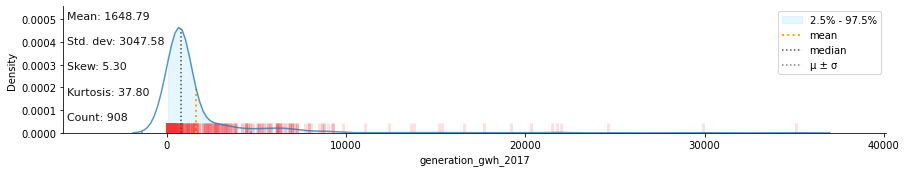

In [212]:
import klib
%matplotlib inline
klib.dist_plot(df)

In [213]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['primary_fuel'] = LE.fit_transform(df['primary_fuel'])

df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,1,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,7,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,2,2004.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,7,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,1,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700


There was only one variable left to be encoded, i.e. primary_fuel. So, i encoded it.

In [214]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))

threshold=3
print(np.where(z>3))

df_new=df[(z<3).all(axis=1)]
df_new

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 180,
       184, 210, 210, 210, 210, 210, 210, 222, 240, 245, 309, 309, 309,
       309, 309, 309, 324, 334, 341, 343, 361, 364, 365, 365, 365, 365,
       365, 365, 372, 376, 389, 417, 428, 445, 455, 479, 483, 485, 494,
       494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 500, 520,
       530, 533, 533, 539, 542, 547, 575, 584, 602, 622, 624, 639, 649,
       649, 649, 649, 649, 649, 658, 658, 658, 658, 658, 658, 696, 696,
       696, 696, 696, 707, 710, 722, 722, 722, 722, 722, 725, 725, 725,
       725, 725, 727, 727, 727, 727, 727, 727, 729, 787, 787, 787, 787,
       787, 787, 789, 808, 809, 809, 809, 809, 809, 809, 819, 848, 849,
       849, 881, 881, 881, 881, 881, 881]), array([0, 7, 8, 9, 0, 5, 6, 7, 8, 9, 5, 6, 2, 2, 0, 5, 6, 7, 8, 9, 4, 2,
       2, 0, 5, 6, 7, 8, 9, 2, 2, 2, 4, 2, 0, 0, 5, 6, 7, 8, 9, 4, 0, 2,
       2, 2, 4, 4, 4, 0, 4, 0, 5, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9, 2, 2, 2,
       5, 6, 4, 

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,1,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,7,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,2,2004.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,7,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,1,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700


By removing outliers, we are going to loose 7% of data which is acceptable, hence i will proceed with the new dataset.

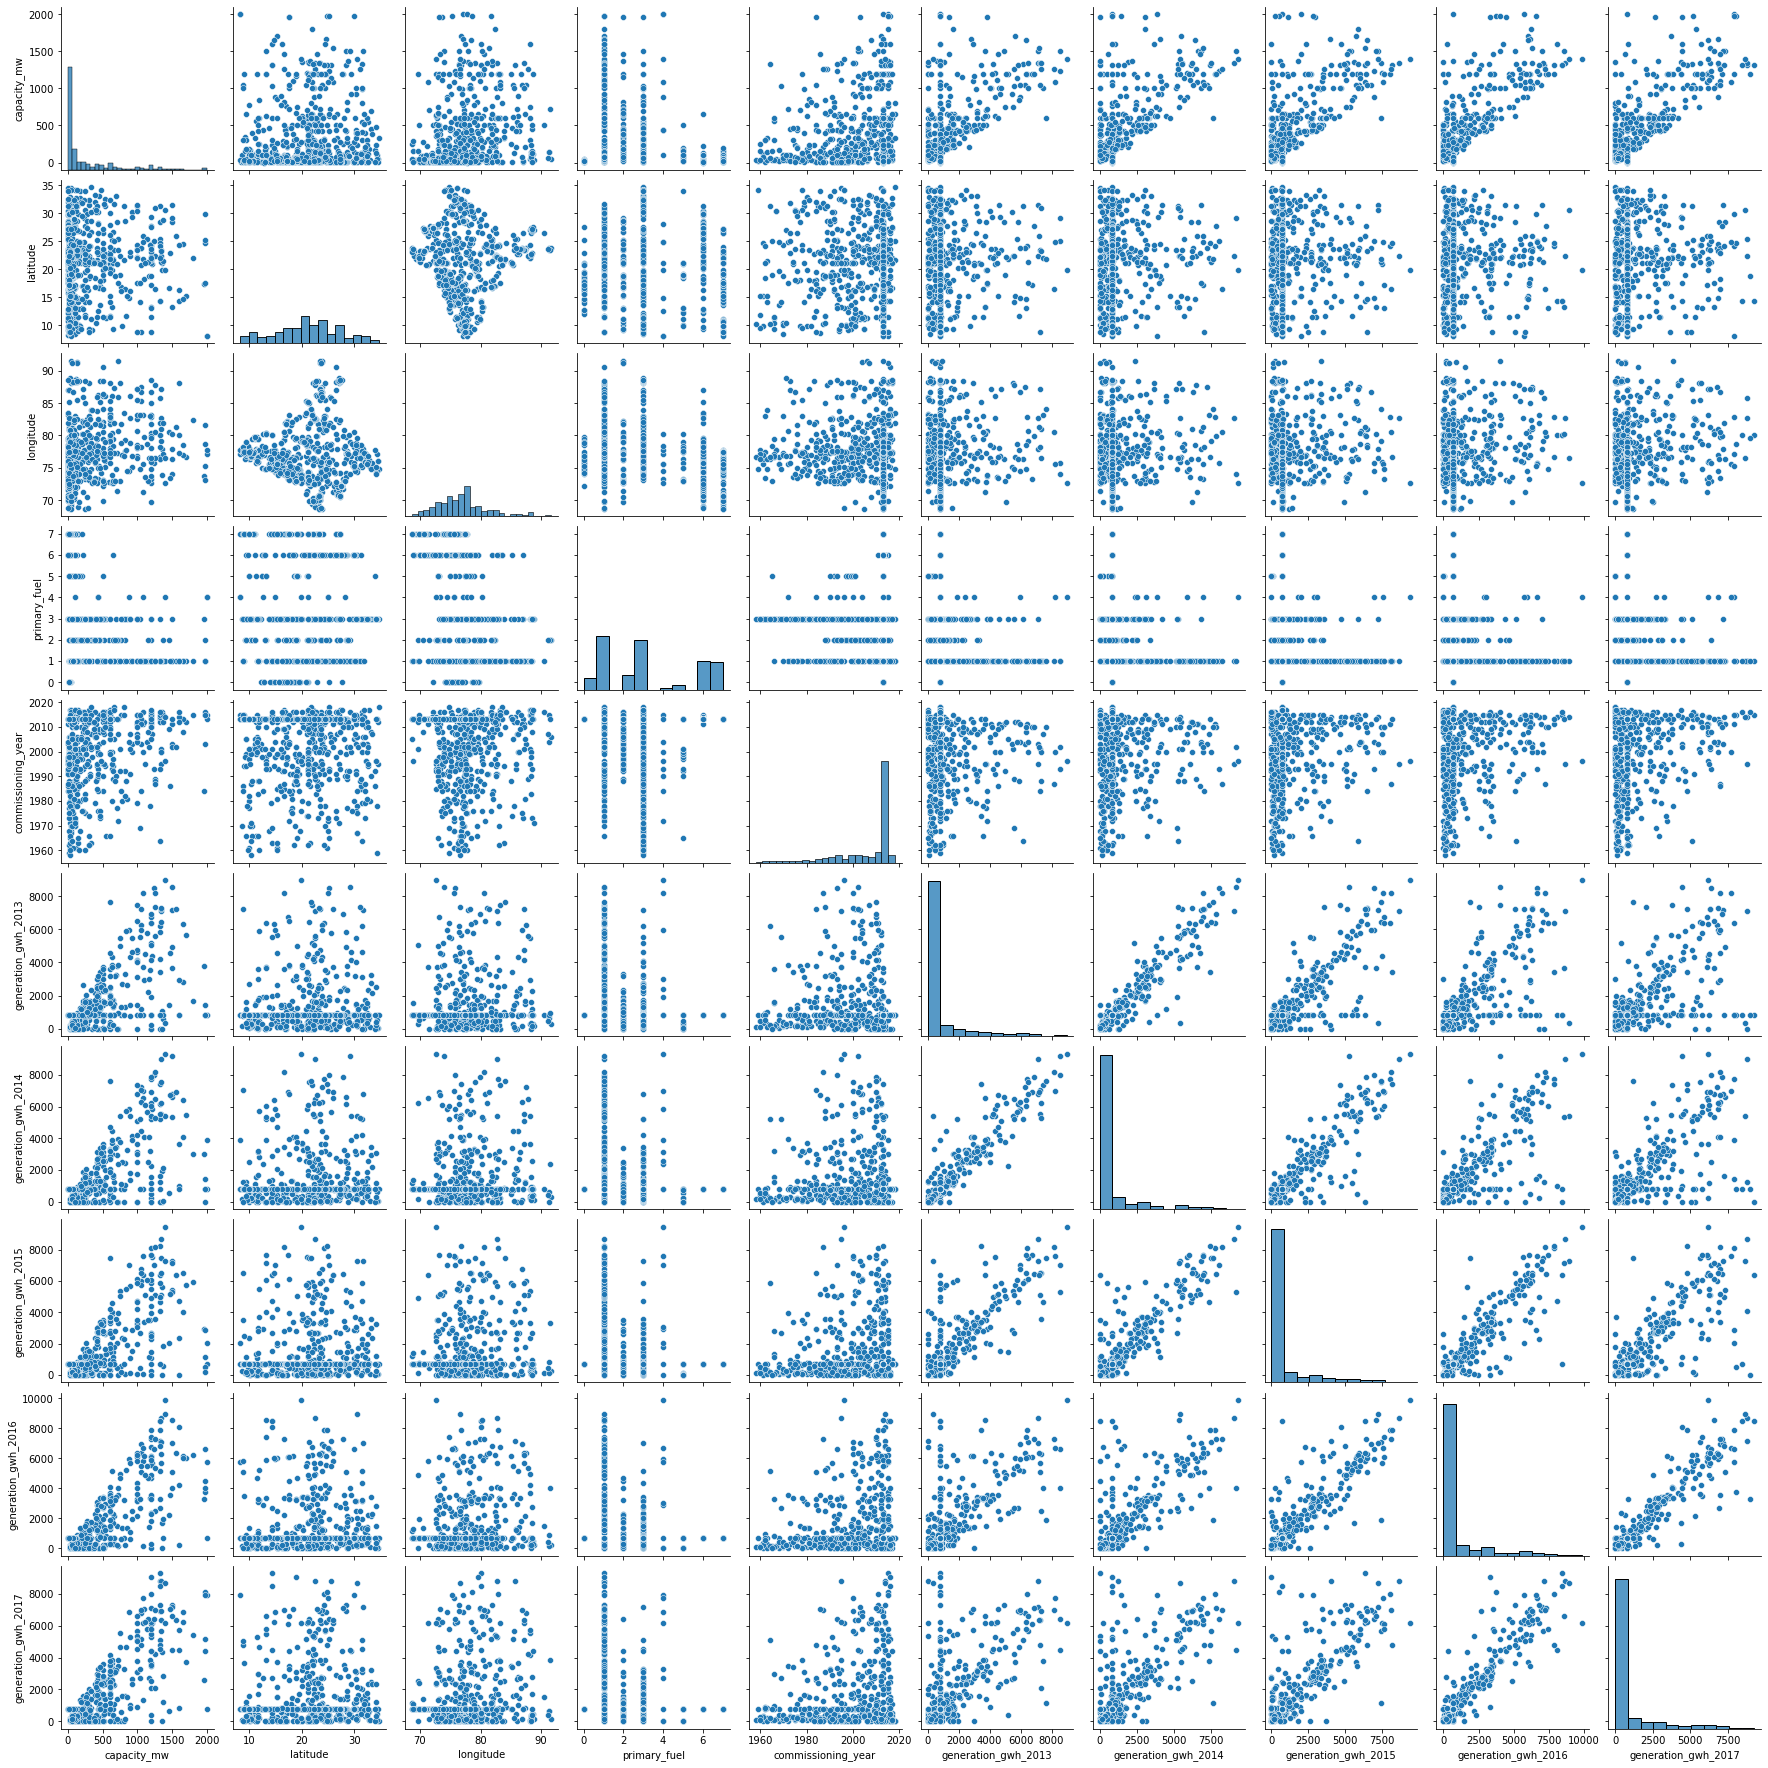

In [215]:
import seaborn as sns
sns.pairplot(df_new)

<AxesSubplot:>

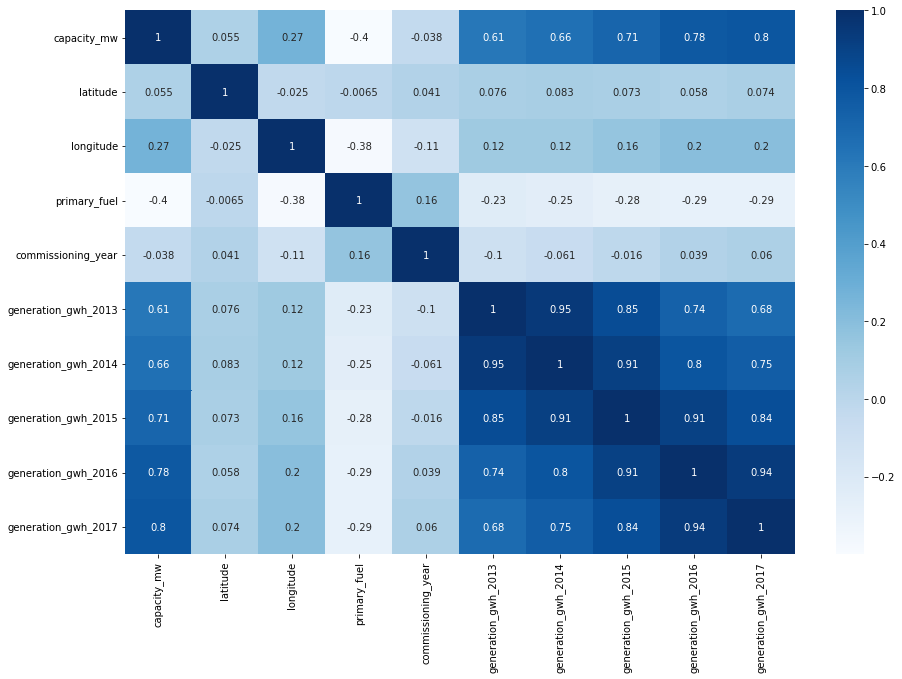

In [216]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_new.corr(), annot=True, cmap='Blues')

From correlation heatmap and paiplot we can see that generation 2013, 2014, 2015, 2016 and 2016, all have problem of multicollinearity, but as we have very less variables, but with the target column they have extremely good correlation, hence i will keep all of them.

In [217]:
X = df_new.drop(['capacity_mw'], axis=1)
X

,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,6,2011.0,797.063475,805.760000,701.027250,716.728350,807.601700
1,24.7663,74.6090,1,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
2,21.9038,69.3732,7,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
3,23.8712,91.3602,2,2004.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.4091,1,2015.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,2016.0,797.063475,805.760000,0.994875,233.596650,865.400000
904,12.8932,78.1654,6,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
905,15.2758,75.5811,7,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
906,24.3500,73.7477,1,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700


In [218]:
y = df_new.iloc[:,0]
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 849, dtype: float64

In [219]:
from sklearn.preprocessing import StandardScaler

sv = StandardScaler()
x = sv.fit_transform(X)
x = pd.DataFrame(x)

In [220]:
x

,0,1,2,3,4,5,6,7,8
0,1.156570,-0.891575,1.171760,0.456050,-0.265913,-0.276043,-0.306775,-0.313577,-0.303620
1,0.598168,-0.566665,-0.978747,0.606035,-0.265913,-0.276043,-0.306775,-0.313577,-0.303620
2,0.130464,-1.809932,1.601862,0.606035,-0.265913,-0.276043,-0.306775,-0.313577,-0.303620
3,0.451917,3.410992,-0.548645,-0.068898,-0.383876,-0.402376,-0.214225,-0.208318,-0.390451
4,0.139695,1.285508,-0.978747,0.756020,0.355876,1.222583,3.075229,3.122742,2.460205
...,...,...,...,...,...,...,...,...,...
844,-0.785975,0.085814,-0.978747,0.831013,-0.265913,-0.276043,-0.760727,-0.613995,-0.268726
845,-1.341779,0.277820,1.171760,0.606035,-0.265913,-0.276043,-0.306775,-0.313577,-0.303620
846,-0.952486,-0.335835,1.601862,0.606035,-0.265913,-0.276043,-0.306775,-0.313577,-0.303620
847,0.530148,-0.771185,-0.978747,0.606035,-0.265913,-0.276043,-0.306775,-0.313577,-0.303620


In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [222]:
from sklearn.metrics import r2_score

maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    r2score = r2_score(y_test,pred)
    if r2score>maxscore:
        maxscore=r2score
        maxRS=i
print("Best r2 score is ", maxscore, 'on Random state ', maxRS)

Best r2 score is  0.7846041749422439 on Random state  91


With this code I come to know that the best accuracy we can achieve with the Linear regression is 78% and the random state which is ideal for train and test split is 91. Hence now I will use rondom state as 1 for train test split.

In [223]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=91)

In [224]:
x_test.shape

(255, 9)

In [225]:
x_train.shape

(594, 9)

In [226]:
y_test.shape

(255,)

In [227]:
y_train.shape

(594,)

In [228]:
from sklearn.linear_model import Lasso
model=[LinearRegression(),KNeighborsRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor(),Lasso()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    r2sscore = r2_score(y_test,m_pred)
    MSE= mean_squared_error(y_test,m_pred)
    
    print(m)
    print(m.score(x_train,y_train))
    print('R2 score for :', m, 'is', r2sscore)
    print('Mean Squared Error for ',m ,"is:" ,MSE)
    print("\n")

LinearRegression()
0.6263747588868906
R2 score for : LinearRegression() is 0.7846041749422417
Mean Squared Error for  LinearRegression() is: 40645.08551159485


KNeighborsRegressor()
0.8272572164067654
R2 score for : KNeighborsRegressor() is 0.845036841227221
Mean Squared Error for  KNeighborsRegressor() is: 29241.47131346447


DecisionTreeRegressor()
0.9998548584257356
R2 score for : DecisionTreeRegressor() is 0.7496064961199811
Mean Squared Error for  DecisionTreeRegressor() is: 47249.13017242647


SVR()
-0.1028216809785012
R2 score for : SVR() is -0.06614485072981591
Mean Squared Error for  SVR() is: 201181.00531447167


RandomForestRegressor()
0.9643069013642929
R2 score for : RandomForestRegressor() is 0.8463912548780305
Mean Squared Error for  RandomForestRegressor() is: 28985.894128342807


Lasso()
0.6263733081380065
R2 score for : Lasso() is 0.7847328242637088
Mean Squared Error for  Lasso() is: 40620.809448348766




In [229]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for i in model:
    kfold=KFold(5)
    score=cross_val_score(i,x,y,cv=kfold)
    print(i, "CV Score is ",score.mean())

LinearRegression() CV Score is  0.6576457638674564
KNeighborsRegressor() CV Score is  0.7462668815114143
DecisionTreeRegressor() CV Score is  0.6420068417252639
SVR() CV Score is  -0.12397118058428562
RandomForestRegressor() CV Score is  0.77850897705995
Lasso() CV Score is  0.6616885178090333


When i compared the CV score with the R2 score for each modesl, RandomForestRegressor has the least difference which is 6, Hence i will proceed with it for the hyper parameter tuning. 

In [230]:
parameters = {'n_estimators' : np.arange(1,20),
             'max_features' : ["auto","sqrt","log2"],
             'min_samples_split': np.arange(1,20),
             'bootstrap' : [True, False],
             'oob_score' : [True, False] }

In [231]:
from sklearn.model_selection import GridSearchCV
#GSV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)
#GSV.fit(x_train,y_train)

In [232]:
#GSV.best_params_

In [233]:
Final_Model = RandomForestRegressor(bootstrap= True, max_features= 'log2', min_samples_split= 13, n_estimators= 13, oob_score=False)
Final_Model.fit(x_train,y_train)
Final_Model.score(x_train,y_train)
model_pred=Final_Model.predict(x_test)
r2score = r2_score(y_test,model_pred)
MSE= mean_squared_error(y_test,model_pred)

print(Final_Model.score(x_train,y_train)*100)
print('R2 score is :',r2score)
print('Mean Squared Error is ',MSE) 

89.46578924871574
R2 score is : 0.8697803389187423
Mean Squared Error is  24572.385553523884


The best R2 score I acan achieve after hyper parameter tuning is 0.87 and the model accuracy 90%.

# Classification problem

In [234]:
warnings.filterwarnings('ignore')
df_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,1,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,7,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,2,2004.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,7,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,1,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700


In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [236]:
X2 = df_new.drop(['primary_fuel'], axis=1)
X2

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2011.0,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,2004.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,2015.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.0,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,2013.0,797.063475,805.760000,701.027250,716.728350,807.601700


In [237]:
y2 = df_new.iloc[:,3:4]
y2

,primary_fuel
0,6
1,1
2,7
3,2
4,1
...,...
903,1
904,6
905,7
906,1


In [238]:
x2 = sv.fit_transform(X2)
x2 = pd.DataFrame(x2)

In [239]:
x2

,0,1,2,3,4,5,6,7,8
0,-0.631735,1.156570,-0.891575,0.456050,-0.265913,-0.276043,-0.306775,-0.313577,-0.303620
1,-0.402388,0.598168,-0.566665,0.606035,-0.265913,-0.276043,-0.306775,-0.313577,-0.303620
2,-0.543598,0.130464,-1.809932,0.606035,-0.265913,-0.276043,-0.306775,-0.313577,-0.303620
3,-0.313531,0.451917,3.410992,-0.068898,-0.383876,-0.402376,-0.214225,-0.208318,-0.390451
4,3.685023,0.139695,1.285508,0.756020,0.355876,1.222583,3.075229,3.122742,2.460205
...,...,...,...,...,...,...,...,...,...
844,3.204716,-0.785975,0.085814,0.831013,-0.265913,-0.276043,-0.760727,-0.613995,-0.268726
845,-0.630534,-1.341779,0.277820,0.606035,-0.265913,-0.276043,-0.306775,-0.313577,-0.303620
846,-0.576499,-0.952486,-0.335835,0.606035,-0.265913,-0.276043,-0.306775,-0.313577,-0.303620
847,-0.445616,0.530148,-0.771185,0.606035,-0.265913,-0.276043,-0.306775,-0.313577,-0.303620


In [240]:
maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxscore:
        maxscore=acc
        maxRS=i
print("Best accuracy score is ", maxscore, 'on Random state ', maxRS)

Best accuracy score is  0.7803921568627451 on Random state  106


With this code I come to know that the best accuracy we can achieve with the Decision Classifier is 75% and the random state which is ideal for train and test split is 75. Hence now I will use rondom state as 1 for train test split.

In [241]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3, random_state=50)

In [242]:
x_test.shape

(255, 9)

In [243]:
x_train.shape

(594, 9)

In [244]:
y_test.shape

(255, 1)

In [245]:
y_train.shape

(594, 1)

In [246]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(), RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    print('accuracy_score of',m,"is:")
    print(accuracy_score(y_test,m_pred))
    print(confusion_matrix(y_test,m_pred))
    print(classification_report(y_test,m_pred))
    print("\n")

accuracy_score of DecisionTreeClassifier() is:
0.7803921568627451
[[ 7  2  0  0  0  0  0  5]
 [ 1 55  5  5  0  0  2  1]
 [ 0  8 10  1  0  1  0  0]
 [ 0  4  2 67  0  0  1  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  1  0  0  4  0  0]
 [ 1  0  1  0  0  0 31  4]
 [ 2  2  0  0  0  0  6 25]]
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.77      0.80      0.79        69
           2       0.53      0.50      0.51        20
           3       0.92      0.91      0.91        74
           4       0.00      0.00      0.00         1
           5       0.67      0.80      0.73         5
           6       0.78      0.84      0.81        37
           7       0.71      0.71      0.71        35

    accuracy                           0.78       255
   macro avg       0.63      0.63      0.63       255
weighted avg       0.78      0.78      0.78       255



accuracy_score of SVC() is:
0.6784313725490196
[[ 0  2  0  0  0 

In [247]:
for i in model:
    kfold=KFold(5)
    score=cross_val_score(i,x2,y2,cv=kfold)
    print(i, "CV Score is ",score.mean())

DecisionTreeClassifier() CV Score is  0.712641837800209
SVC() CV Score is  0.618371040723982
KNeighborsClassifier() CV Score is  0.7090636964845111
RandomForestClassifier() CV Score is  0.7620605638705186


When i compared the CV score with the accuracy score for each model, RandomForestClassifier has the least difference which is 5, Hence i will proceed with it for the hyper parameter tuning. 

In [248]:
parameters2 = {'n_estimators' : np.arange(1,20),
             'max_features' : ["auto","sqrt","log2"],
             'min_samples_split': np.arange(1,20),
             'bootstrap' : [True, False],
             'oob_score' : [True, False] }

In [249]:
#GSV2 = GridSearchCV(RandomForestClassifier(),parameters2,cv=5)
#GSV2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'oob_score': [True, False]})

In [250]:
GSV2.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 15,
 'oob_score': False}

In [252]:
Final_model=RandomForestClassifier(bootstrap= True, max_features= 'sqrt', min_samples_split= 4, n_estimators= 15, oob_score=False)
Final_model.fit(x_train,y_train)
Final_model.score(x_train,y_train)
pred=Final_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

77.64705882352942
[[10  2  0  0  0  0  0  2]
 [ 0 57  3  4  0  1  2  2]
 [ 0  6  9  4  0  1  0  0]
 [ 0  6  1 64  0  2  1  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  3  0  0  2  0  0]
 [ 0  3  0  0  0  0 28  6]
 [ 2  1  0  0  0  0  4 28]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.76      0.83      0.79        69
           2       0.56      0.45      0.50        20
           3       0.88      0.86      0.87        74
           4       0.00      0.00      0.00         1
           5       0.33      0.40      0.36         5
           6       0.80      0.76      0.78        37
           7       0.74      0.80      0.77        35

    accuracy                           0.78       255
   macro avg       0.61      0.60      0.61       255
weighted avg       0.77      0.78      0.77       255



The best accuracy score I can achieve after hyper parameter tuning is 75%.